<a href="https://colab.research.google.com/github/Winyuchonn/projectseacount/blob/main/testyolomodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sun Feb 26 06:12:18 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0    29W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.8/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

In [7]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow

rf = Roboflow(api_key="k6PbDEnl3gyJrEVXz41W")
project = rf.workspace("test-ij2el").project("dip-seftr")
dataset = project.version(1).download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 KB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 7.0 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.28, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to dip-1 in yolov8:: 100%|██████████| 262/262 [00:00<00:00, 1328.28it/s]


## Custom Training

In [9]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=10 imgsz=640

/content
Ultralytics YOLOv8.0.28 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/datasets/dip-1/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=Fals

In [10]:
!ls {HOME}/runs/segment/train2/

args.yaml					    MaskR_curve.png
BoxF1_curve.png					    results.csv
BoxP_curve.png					    results.png
BoxPR_curve.png					    train_batch0.jpg
BoxR_curve.png					    train_batch1.jpg
confusion_matrix.png				    train_batch2.jpg
events.out.tfevents.1677393333.d0ac3138407a.6220.0  val_batch0_labels.jpg
MaskF1_curve.png				    val_batch0_pred.jpg
MaskP_curve.png					    weights
MaskPR_curve.png


/content


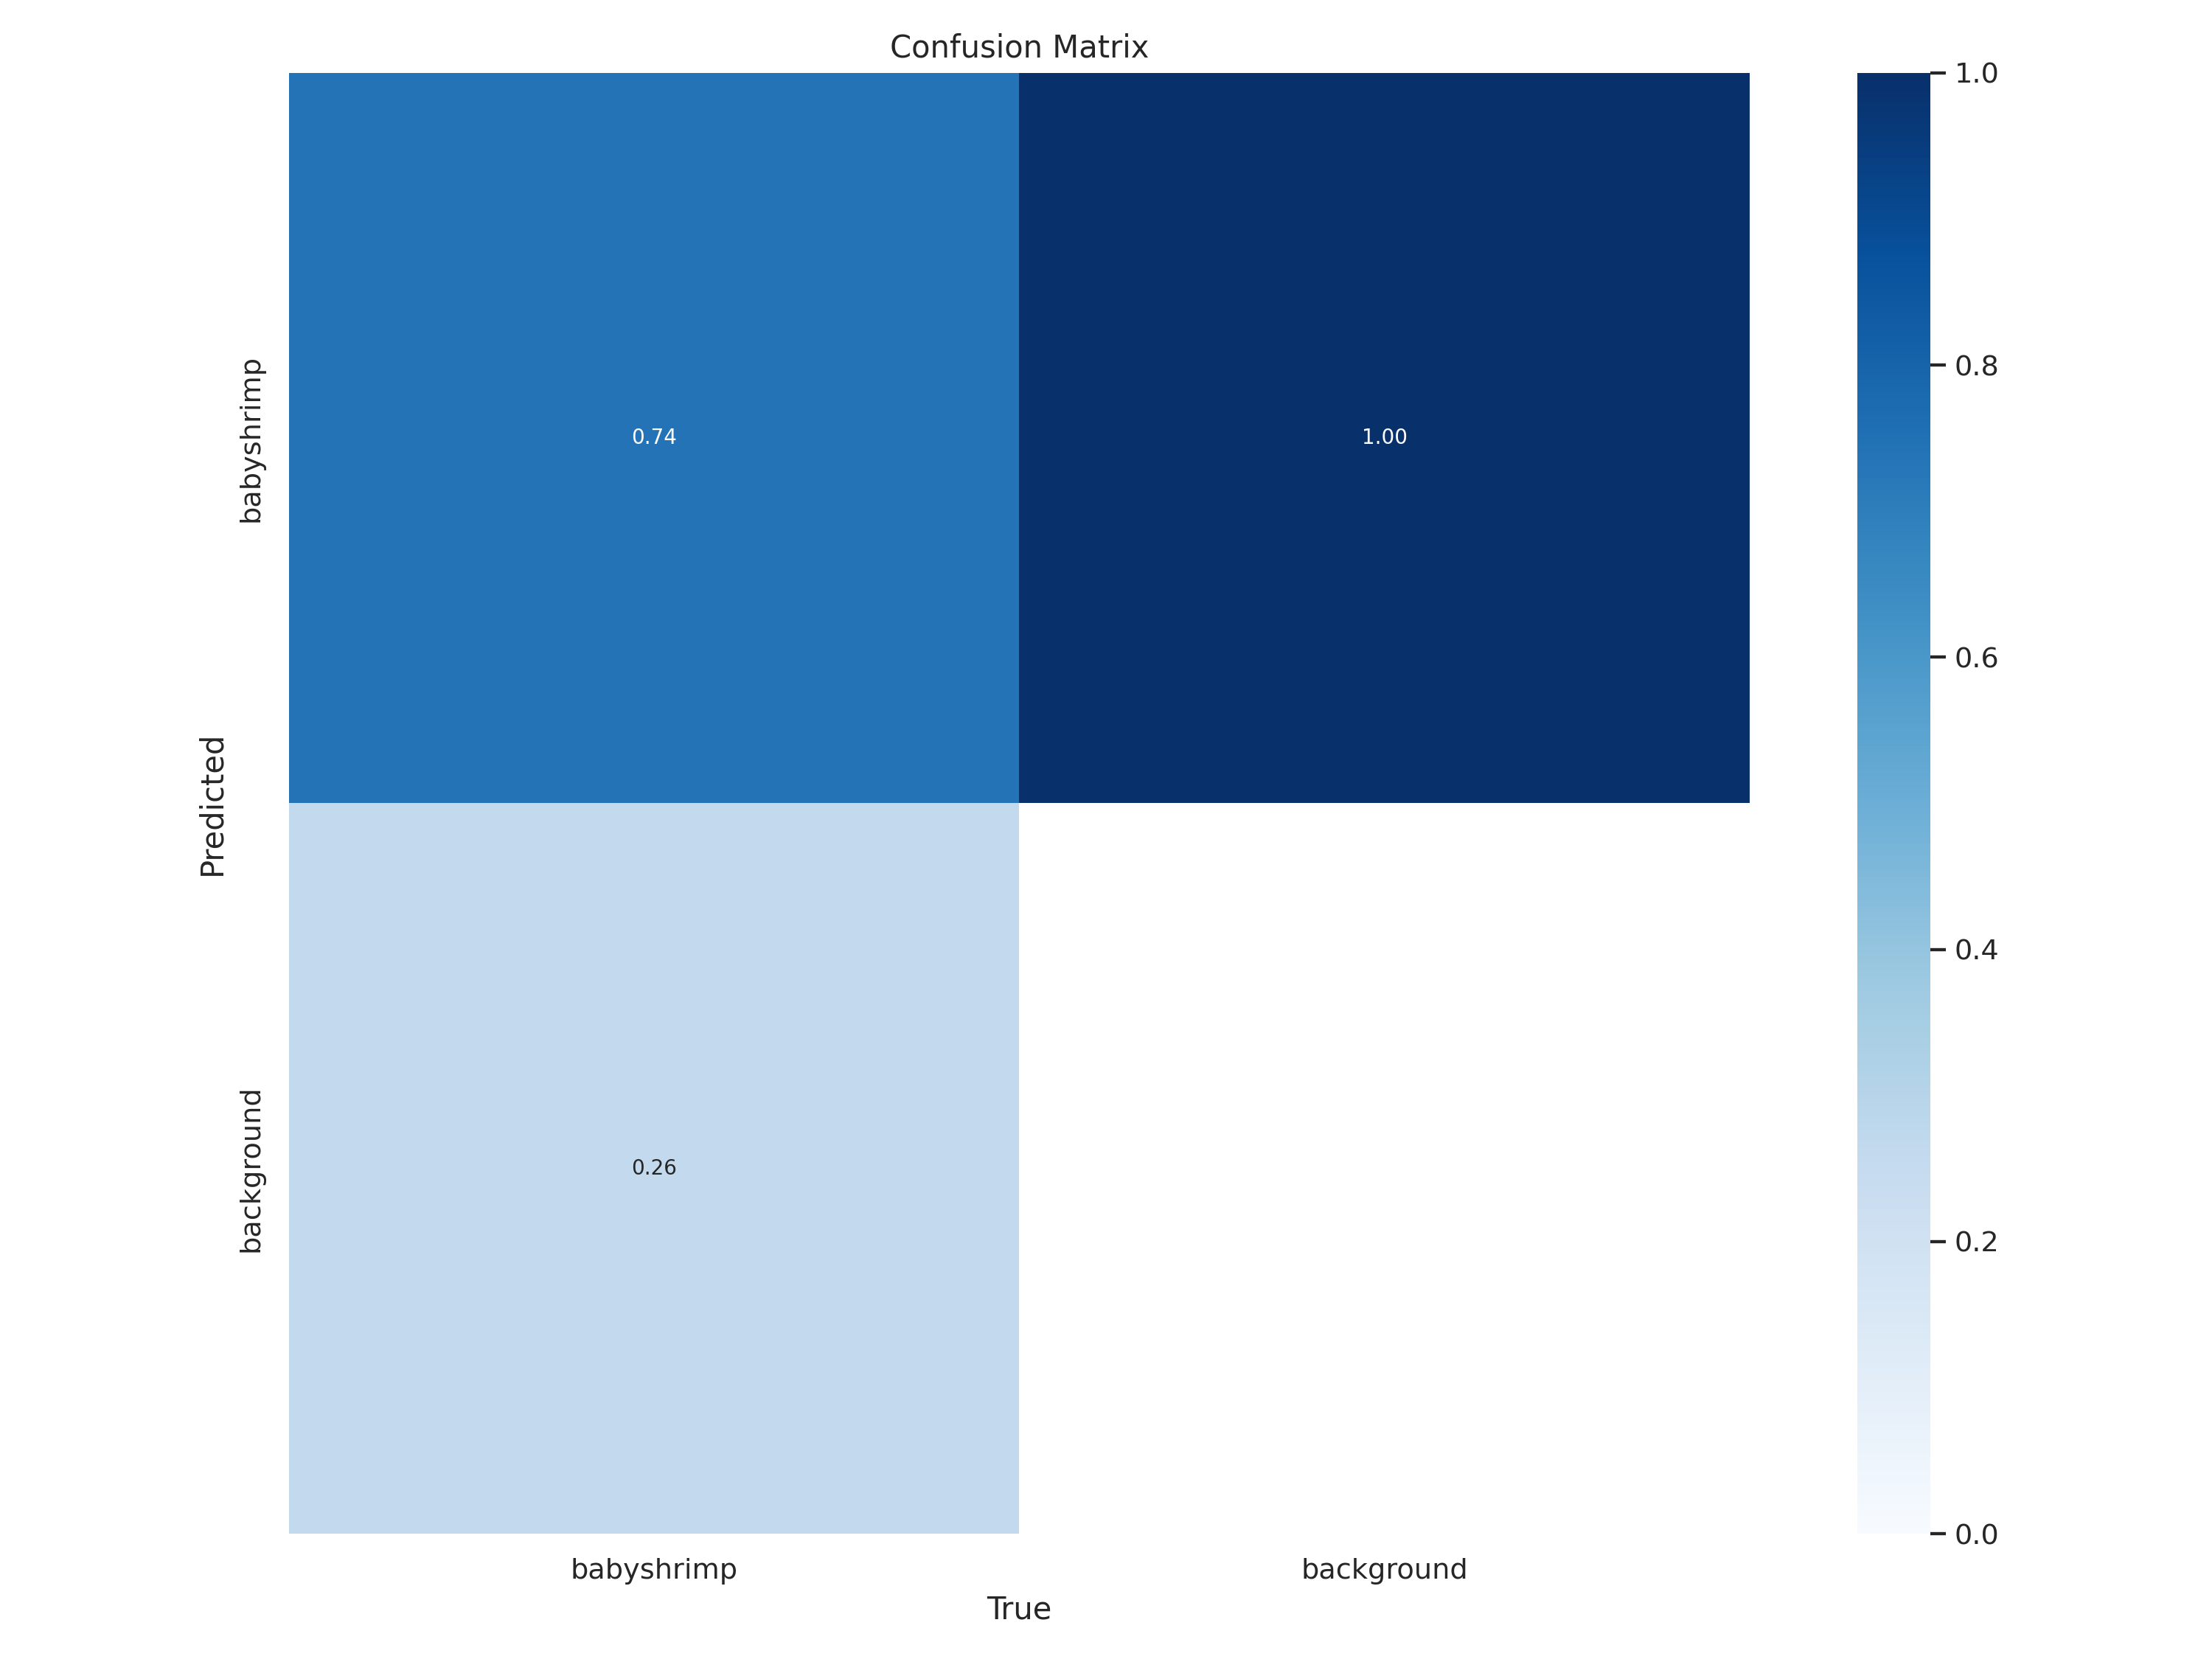

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/confusion_matrix.png', width=600)

/content


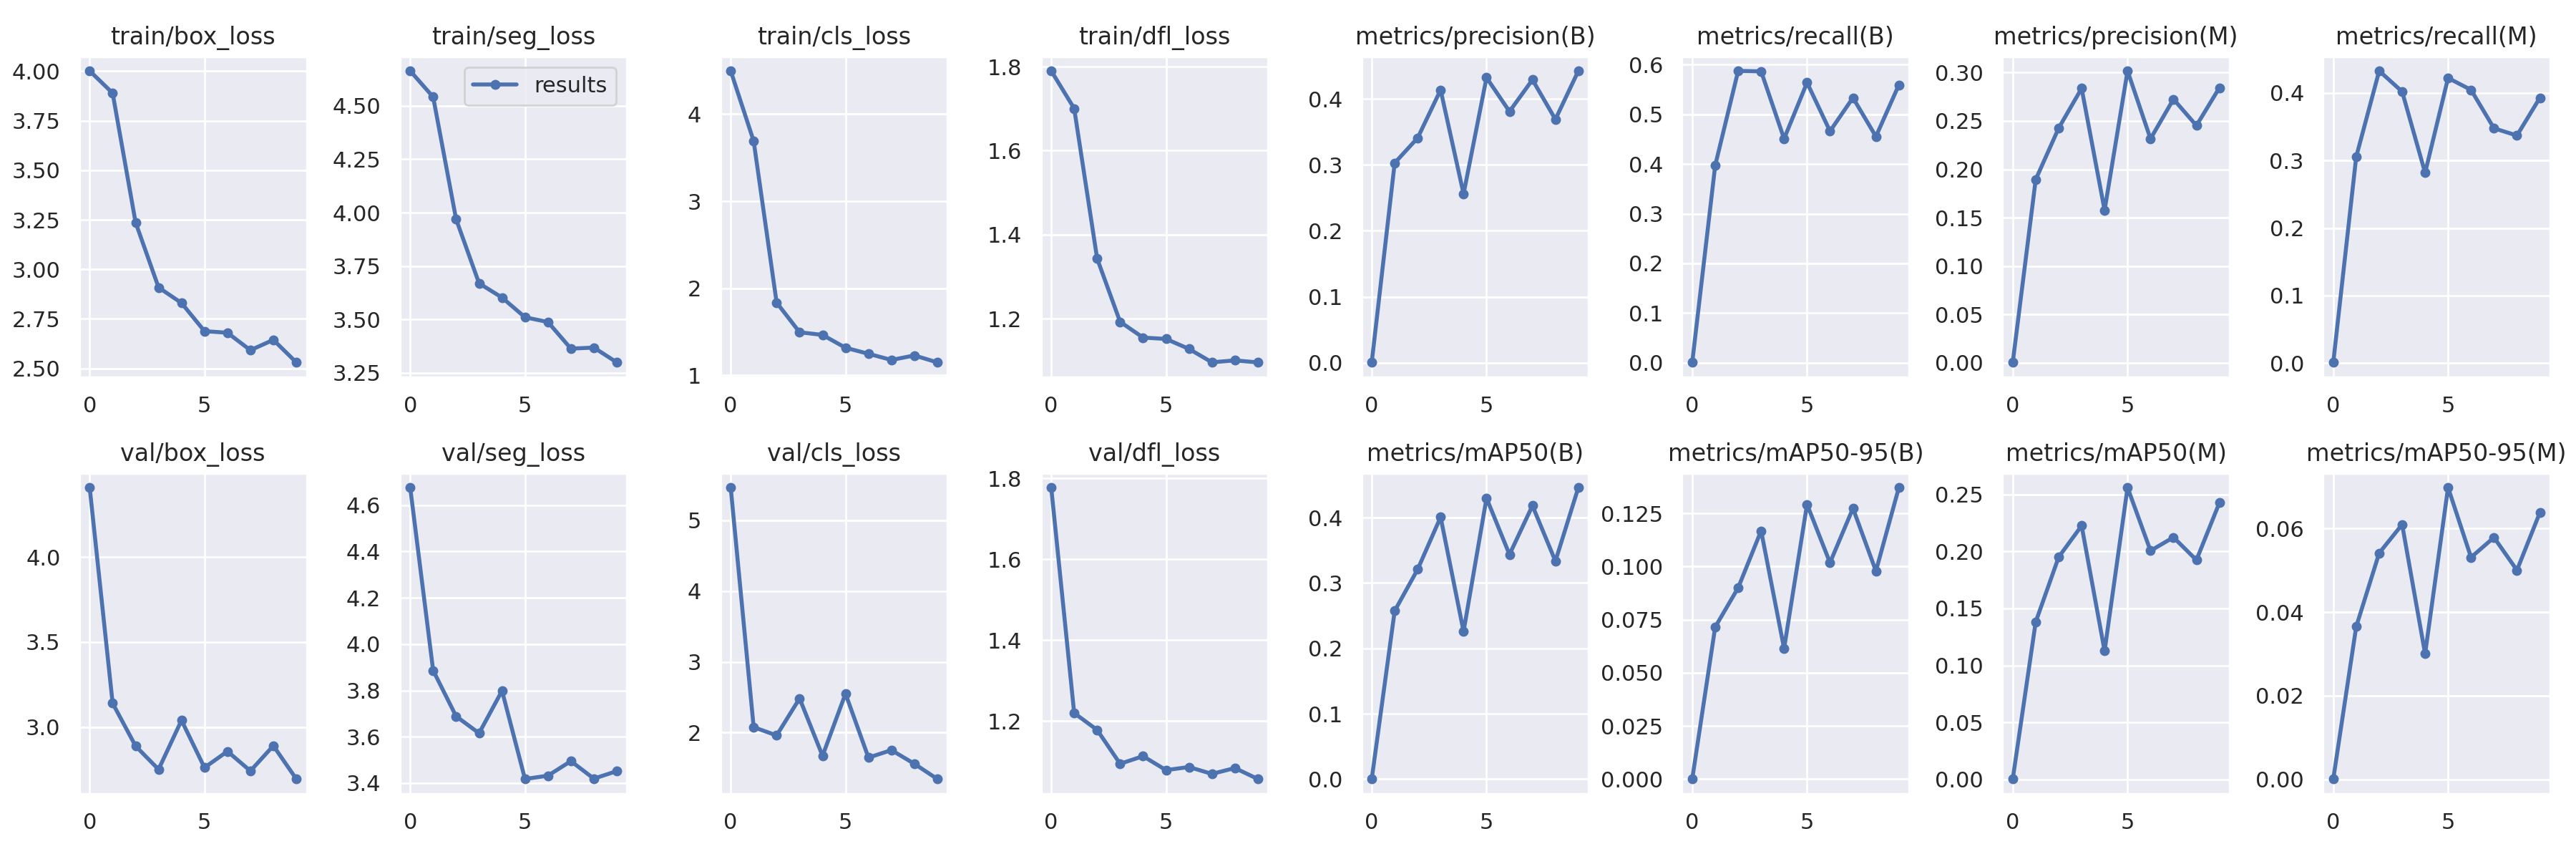

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/results.png', width=600)

In [13]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train2/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.28 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/datasets/dip-1/valid/labels.cache... 25 images, 0 backgrounds, 0 corrupt: 100% 25/25 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 2/2 [00:07<00:00,  3.61s/it]
                   all         25       4198      0.442      0.558      0.446      0.138      0.271      0.373      0.222     0.0575
Speed: 0.3ms pre-process, 16.8ms inference, 0.0ms loss, 3.8ms post-process per image


## Inference with Custom Model

In [14]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

/content
Ultralytics YOLOv8.0.28 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs

image 1/13 /content/datasets/dip-1/test/images/12_jpg.rf.c3c7bc02a9ed92f989d9f0c87b816a55.jpg: 640x640 300 babyshrimps, 21.8ms
image 2/13 /content/datasets/dip-1/test/images/1467_jpg.rf.353669d3a957bbe31b6fcbc5a0e37bd3.jpg: 640x640 297 babyshrimps, 17.2ms
image 3/13 /content/datasets/dip-1/test/images/1469_jpg.rf.e7c4e6c08a940770869aff4cd0c14f3d.jpg: 640x640 300 babyshrimps, 17.2ms
image 4/13 /content/datasets/dip-1/test/images/1470_jpg.rf.49e8a5ef0fb5504d2eb6eec4340c378d.jpg: 640x640 289 babyshrimps, 17.2ms
image 5/13 /content/datasets/dip-1/test/images/1473_jpg.rf.2331ed2736359a65864feaae7efd1e28.jpg: 640x640 300 babyshrimps, 17.2ms
image 6/13 /content/datasets/dip-1/test/images/1474_jpg.rf.561e18d43df60e5db5c2d30210df3f1c.jpg: 640x640 294 babyshrimps, 17.2ms
image 7/13 /content/datasets/dip-1/test/imag

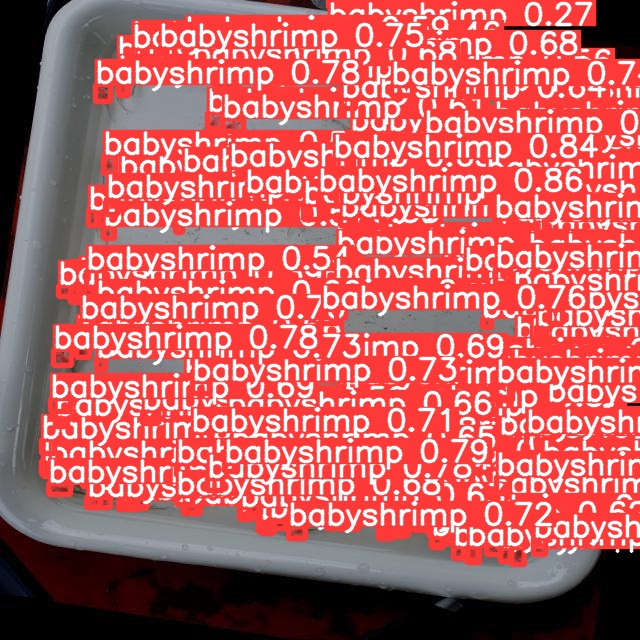

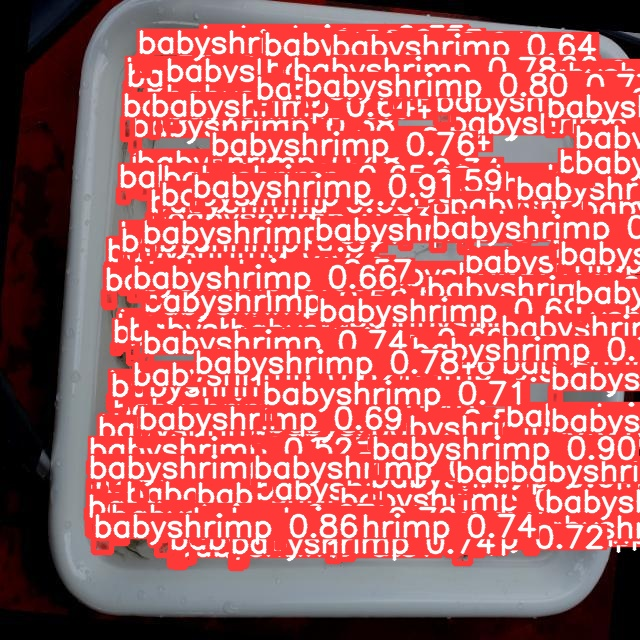

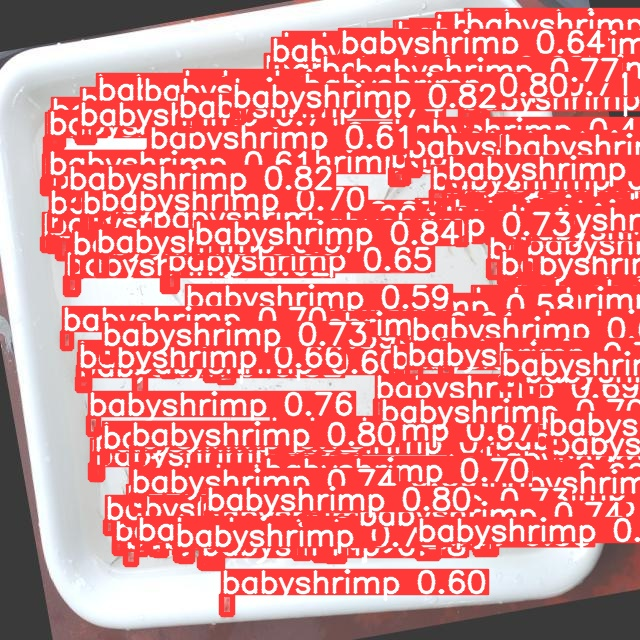

In [16]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [5]:
from ultralytics import YOLO 


In [6]:
model = YOLO("/content/runs/segment/train2/weights/best.pt") 

In [8]:
model.predict(source = "/content/runs/segment/train2/359.jpg", show=True, save=True, hide_labels=True, hide_conf=False, conf=0.5,  line_thickness=2, box=False, max_det=300)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics YOLOv8.0.28 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs

image 1/1 /content/runs/segment/train2/359.jpg: 640x480 140 babyshrimps, 18.7ms
Speed: 0.6ms pre-process, 18.7ms inference, 5.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict7


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([140, 6])
 dtype: torch.float32
  + tensor([[5.31000e+02, 2.54100e+03, 5.82000e+02, 2.59200e+03, 9.03619e-01, 0.00000e+00],
         [3.43000e+02, 2.64400e+03, 3.81000e+02, 2.74000e+03, 8.30903e-01, 0.00000e+00],
         [8.96000e+02, 1.29300e+03, 9.59000e+02, 1.37500e+03, 8.08425e-01, 0.00000e+00],
         [1.04300e+03, 2.82000e+03, 1.08800e+03, 2.87900e+03, 7.98254e-01, 0.00000e+00],
         [4.22000e+02, 9.19000e+02, 4.91000e+02, 9.80000e+02, 7.79913e-01, 0.00000e+00],
         [1.90300e+03, 1.09400e+03, 1.97400e+03, 1.15200e+03, 7.71688e-01, 0.00000e+00],
         [1.29500e+03, 3.41500e+03, 1.38000e+03, 3.48200e+03, 7.71612e-01, 0.00000e+00],
         [5.42000e+02, 2.96000e+03, 5.80000e+02, 3.00600e+03, 7.69239e-01, 0.00000e+00],
         [5.37000e+02, 2.51700e+03, 5.97000e+02, 2.59000e+03, 7.68053e-01, 0.00000e+00],
         [1.55400e+03, 2.52500e+03, 1.59400